# Лебедева София Константиновна ИУ5-63Б

## Варинат 10

Задача №2. \
Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему? \
Для студентов групп ИУ5-63Б, ИУ5Ц-83Б - для произвольной колонки данных построить график "Ящик с усами (boxplot)". \
Датасет №2

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
# Установка случайного зерна
np.random.seed(42)

In [3]:
from sklearn.datasets import load_wine
data = load_wine()
# Наименования признаков
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [4]:
list(data.target_names)

['class_0', 'class_1', 'class_2']

In [5]:
# Сформируем DataFrame
df = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= data['feature_names'] + ['target'])

In [6]:
df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0.0


In [7]:
total_count = df.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 178


In [8]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [9]:
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                          float64
dtype: object

### Посмотрю насколько уникальны значения, признаков

In [10]:
for column in df.columns:
    unique_values = df[column].unique()
    unique_count = len(unique_values)
    print(f"Столбец '{column}': уникальные значения - {unique_values}, количество уникальных значений - {unique_count}")

Столбец 'alcohol': уникальные значения - [14.23 13.2  13.16 14.37 13.24 14.2  14.39 14.06 14.83 13.86 14.1  14.12
 13.75 14.75 14.38 13.63 14.3  13.83 14.19 13.64 12.93 13.71 12.85 13.5
 13.05 13.39 13.3  13.87 14.02 13.73 13.58 13.68 13.76 13.51 13.48 13.28
 13.07 14.22 13.56 13.41 13.88 14.21 13.9  13.94 13.82 13.77 13.74 13.29
 13.72 12.37 12.33 12.64 13.67 12.17 13.11 13.34 12.21 12.29 13.49 12.99
 11.96 11.66 13.03 11.84 12.7  12.   12.72 12.08 12.67 12.16 11.65 11.64
 12.69 11.62 12.47 11.81 12.6  12.34 11.82 12.51 12.42 12.25 12.22 11.61
 11.46 12.52 11.76 11.41 11.03 12.77 11.45 11.56 11.87 12.07 12.43 11.79
 12.04 12.86 12.88 12.81 12.53 12.84 13.36 13.52 13.62 12.87 13.32 13.08
 12.79 13.23 12.58 13.17 13.84 12.45 14.34 12.36 13.69 12.96 13.78 13.45
 12.82 13.4  12.2  14.16 13.27 14.13], количество уникальных значений - 126
Столбец 'malic_acid': уникальные значения - [1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 2.16 1.48 1.73 1.81
 1.92 1.57 1.59 3.1  1.63 3.8  1.86 1.6

#### Видно, что что меньше всего количества уникальных значений у целевого признака, в то время как для остальных признаков количество уникальных значений достаточно близко к размеру датасета.

### Создам категориальный признак alcohol_category, состоящий из трёх значений "Low", "Medium", "High", на основе количественного признака alcohol

In [11]:
bins = 3  # Количество интервалов
labels = ['Low', 'Medium', 'High']
df['alcohol_category'], bin_edges = pd.cut(df['alcohol'], bins=bins, labels=labels, retbins=True)

print("Границы интервалов:")
for i, edge in enumerate(bin_edges):
    if i < len(bin_edges) - 1:
        print(f"Между {edge} и {bin_edges[i+1]} категория - {labels[i]}")

Границы интервалов:
Между 11.0262 и 12.296666666666667 категория - Low
Между 12.296666666666667 и 13.563333333333333 категория - Medium
Между 13.563333333333333 и 14.83 категория - High


In [12]:
bin_edges

array([11.0262    , 12.29666667, 13.56333333, 14.83      ])

In [13]:
df[['alcohol', 'alcohol_category']]

,alcohol,alcohol_category
0,14.23,High
1,13.20,Medium
2,13.16,Medium
3,14.37,High
4,13.24,Medium
...,...,...
173,13.71,High
174,13.40,Medium
175,13.27,Medium
176,13.17,Medium


In [14]:
# Фильтрую DataFrame по условию, что 'alcohol_category' равен 'Low'
low_alcohol_df = df[df['alcohol_category'] == 'Low']


low_alcohol_df[['alcohol', 'alcohol_category']]

,alcohol,alcohol_category
64,12.17,Low
69,12.21,Low
70,12.29,Low
74,11.96,Low
75,11.66,Low
77,11.84,Low
80,12.00,Low
82,12.08,Low
84,11.84,Low
86,12.16,Low


In [15]:
df.shape

(178, 15)

### Добавлю пропуски для категориального признака.
##### Занулю теперь 10% значений признака alcohol_category.

In [16]:
missing_indices = df.sample(frac=0.1).index
df.loc[missing_indices, 'alcohol_category'] = np.nan

# Выводим результат
df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,alcohol_category
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0,High
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0,Medium
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0,Medium
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0,High
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0,Medium
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0.0,High
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0.0,High
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0.0,High
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0.0,High
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0.0,High


In [17]:
df.isnull().sum()

alcohol                          0
malic_acid                       0
ash                              0
alcalinity_of_ash                0
magnesium                        0
total_phenols                    0
flavanoids                       0
nonflavanoid_phenols             0
proanthocyanins                  0
color_intensity                  0
hue                              0
od280/od315_of_diluted_wines     0
proline                          0
target                           0
alcohol_category                18
dtype: int64

### Добавлю пропуски для количественных признаков.

In [18]:
# Делаю случайные 14% значений пропущенными для столбца 'magnesium'
missing_indices_magnesium = df['magnesium'].sample(frac=0.14).index
df.loc[missing_indices_magnesium, 'magnesium'] = np.nan

# Делаю случайные 12% значений пропущенными для столбца 'proanthocyanins'
missing_indices_proanthocyanins = df['proanthocyanins'].sample(frac=0.12).index
df.loc[missing_indices_proanthocyanins, 'proanthocyanins'] = np.nan

# Выводим результат
df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,alcohol_category
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0,High
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0,Medium
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0,Medium
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0,High
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0,Medium
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0.0,High
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0.0,High
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0.0,High
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0.0,High
9,13.86,1.35,2.27,16.0,NaN,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0.0,High


In [19]:
df.isnull().sum()

alcohol                          0
malic_acid                       0
ash                              0
alcalinity_of_ash                0
magnesium                       25
total_phenols                    0
flavanoids                       0
nonflavanoid_phenols             0
proanthocyanins                 21
color_intensity                  0
hue                              0
od280/od315_of_diluted_wines     0
proline                          0
target                           0
alcohol_category                18
dtype: int64

### Заполню пропуски в категориальных признаках

In [20]:
df[['alcohol_category']].describe()

,alcohol_category
count,160
unique,3
top,Medium
freq,77


In [21]:
from sklearn.impute import SimpleImputer

# Создание экземпляра SimpleImputer с параметром strategy='most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Преобразование данных с заменой пропущенных значений для столбца 'alcohol_category'
imputed_data = imputer.fit_transform(df[['alcohol_category']])

# Преобразованные данные в DataFrame
df_imputed = pd.DataFrame(imputed_data, columns=['alcohol_category'])

# Объединяем преобразованный столбец с остальными данными, если они есть
df= pd.concat([df_imputed, df.drop(columns=['alcohol_category'])], axis=1)

df

,alcohol_category,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,High,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,Medium,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,Medium,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,High,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,Medium,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,High,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,Medium,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,Medium,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,Medium,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [22]:
df.isnull().sum()

alcohol_category                 0
alcohol                          0
malic_acid                       0
ash                              0
alcalinity_of_ash                0
magnesium                       25
total_phenols                    0
flavanoids                       0
nonflavanoid_phenols             0
proanthocyanins                 21
color_intensity                  0
hue                              0
od280/od315_of_diluted_wines     0
proline                          0
target                           0
dtype: int64

In [23]:
bin_edges

array([11.0262    , 12.29666667, 13.56333333, 14.83      ])

In [24]:
# Проверяю значения alcohol_category для неправильно определенных интервалов
incorrect_low = df[(df['alcohol'] >= bin_edges[0]) & (df['alcohol'] < bin_edges[1]) & (df['alcohol_category'] != 'Low')]
incorrect_medium = df[(df['alcohol'] >= bin_edges[1]) & (df['alcohol'] < bin_edges[2]) & (df['alcohol_category'] != 'Medium')]
incorrect_high = df[(df['alcohol'] >= bin_edges[2]) & (df['alcohol'] <= bin_edges[3]) & (df['alcohol_category'] != 'High')]

# Соединяю результаты
incorrect_categories = pd.concat([incorrect_low, incorrect_medium, incorrect_high])


print("\nЗначения alcohol_category для неправильно определенных интервалов:")
incorrect_categories[['alcohol', 'alcohol_category']]


Значения alcohol_category для неправильно определенных интервалов:


,alcohol,alcohol_category
82,12.08,Medium
109,11.61,Medium
113,11.41,Medium
119,12.00,Medium
15,13.63,Medium
16,14.30,Medium
19,13.64,Medium
30,13.73,Medium
45,14.21,Medium


In [25]:
incorrect_categories.shape

(9, 15)

#### Видно, что 9 из 18 пропусков заполнены неверно, если посмотреть на те интервалы, по которым строился наш категориальный признак. Так как наиболее частое значение это "Medium", а получилось так, что пропущено было всего 9 таких значений, а все остальные "Low" и "High"

### Заполним пропуски в количественных признаках

In [26]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in df.columns:
    # Количество пустых значений
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка magnesium. Тип данных float64. Количество пустых значений 25, 14.04%.
Колонка proanthocyanins. Тип данных float64. Количество пустых значений 21, 11.8%.


In [27]:
data_num = df[num_cols]
data_num

,magnesium,proanthocyanins
0,127.0,2.29
1,100.0,1.28
2,101.0,2.81
3,113.0,2.18
4,118.0,1.82
...,...,...
173,95.0,1.06
174,102.0,1.41
175,120.0,1.35
176,120.0,1.46


In [28]:
data_num.describe()

,magnesium,proanthocyanins
count,153.000000,157.000000
mean,100.457516,1.572994
std,14.677223,0.570796
min,70.000000,0.410000
25%,88.000000,1.240000
50%,98.000000,1.550000
75%,108.000000,1.950000
max,162.000000,3.580000


In [29]:
import seaborn as sns

<Axes: xlabel='magnesium'>

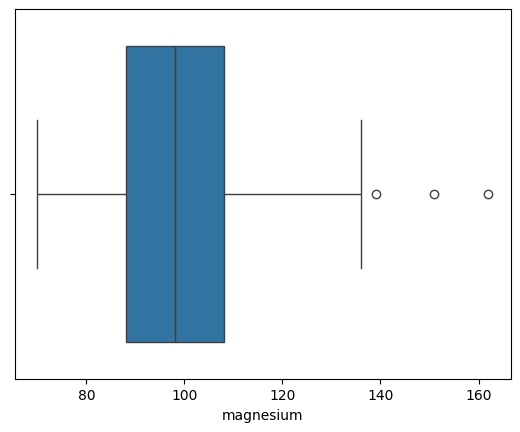

In [30]:
sns.boxplot(x=df['magnesium'])

<Axes: xlabel='proanthocyanins'>

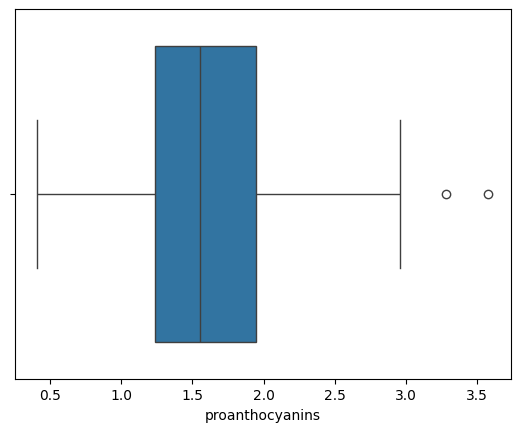

In [31]:
sns.boxplot(x=df['proanthocyanins'])

### Так как есть выбросы в обоих столбцах с пропусками, то буду применять стратегию -- median

In [32]:
from sklearn.impute import MissingIndicator

In [33]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]

    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)

    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)

    filled_data = data_num_imp[mask_missing_values_only]

    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [34]:
# Вызываем функцию для замены пропусков в magnesium
result_magnesium = test_num_impute_col(df, 'magnesium', 'median')
print("Результат для magnesium:", result_magnesium)

Результат для magnesium: ('magnesium', 'median', 25, 98.0, 98.0)


In [35]:
# Вызываем функцию для замены пропусков в magnesium
result_proanthocyanins = test_num_impute_col(df, 'proanthocyanins', 'median')
print("Результат для magnesium:", result_magnesium)

Результат для magnesium: ('magnesium', 'median', 25, 98.0, 98.0)


In [36]:
df['magnesium'].fillna(result_magnesium[3], inplace=True)
df['proanthocyanins'].fillna(result_proanthocyanins[3], inplace=True)

In [37]:
df.isnull().sum()

alcohol_category                0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

## Вывод
Выбор метода обработки пропусков в данных зависит от природы этих пропусков и распределения данных самих признаков.

Для количественных признаков 'magnesium' и 'proanthocyanins', которые содержат выбросы, я бы применила заполнение медианой, чтобы исключить возможное искажение данных.


Наконец, для категориального признака 'alcohol_category' я бы использовала заполнение наиболее часто встречающимся значением (модой), так как это простой и эффективный способ обработки пропусков в категориальных данных.


При выборе признаков для дальнейшего построения моделей машинного обучения, я бы опиралась на важность признаков и их релевантность для задачи, а также на качество информации, содержащейся в этих признаках.

Например, признаки 'alcohol' (различные сорта вин имеют различные уровни алкоголя.) и 'color_intensity' (глубина цвета вина может быть характерным признаком для его сорта.) могут быть важными показателями для определения сорта вина.

'flavanoids' -- флавоноиды являются классом фенольных соединений, которые могут влиять на вкус, аромат и структуру вина.

'proline' -- пролин является аминокислотой и может также вносить свой вклад в характеристики вина.

'total_phenols' -- фенолы также могут играть важную роль во вкусовых и ароматических характеристиках вина.

Что касается искусственно созданного категориального признака alcohol_category, то его не следует использорвать одновременно с количественным признаком alcohol из-за линейной зависимости. Возможнно, его применение будет оправдано вместо alcohol, но это вряд ли. Но если и использовать, такой вариант, то нужно преобразовать знаяения alcohol_category, например, 'Low', 'Medium', 'High' -- 0, 1, 2.

Однако стоит иметь в виду, что окончательный выбор признаков зависит от результатов предварительного анализа данных и экспериментов с моделями машинного обучения, и может потребовать дополнительного анализа и исследования. Можно попробовать применить деревья или случайный лес и т.д. для определения значимости признаков.


## Доп. задание

<Axes: xlabel='alcohol'>

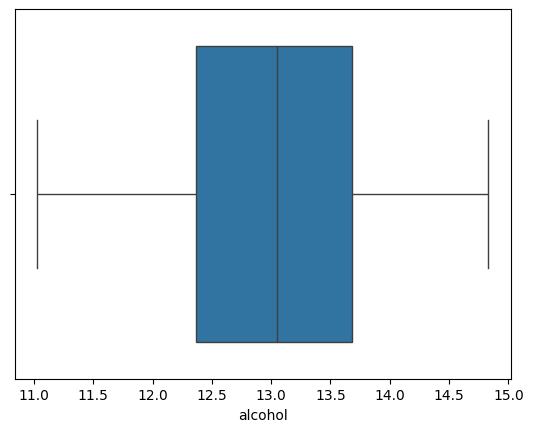

In [38]:
sns.boxplot(x=df['alcohol'])